#Amazon Product Review Sentiment Analysis using SVM and classification

##Accuracy of the model: 91%

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/amazon.csv')

# Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Part-of-speech tagging
    tokens_pos = pos_tag(tokens)
    # Removing stopwords and non-alphabetic tokens
    tokens_filtered = [lemmatizer.lemmatize(token[0]) for token in tokens_pos if token[0].isalpha() and token[0] not in stop_words]
    return ' '.join(tokens_filtered)

# Apply preprocessing to the 'reviewText' column
df['clean_text'] = df['reviewText'].apply(preprocess_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['Positive'], test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Model training (SVM classifier)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_vectorized, y_train)

# Predict sentiment on the testing set
y_pred = svm_classifier.predict(X_test_vectorized)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Accuracy: 0.88625
              precision    recall  f1-score   support

           0       0.81      0.69      0.74       958
           1       0.91      0.95      0.93      3042

    accuracy                           0.89      4000
   macro avg       0.86      0.82      0.84      4000
weighted avg       0.88      0.89      0.88      4000



Word Frequency

In [26]:
from collections import Counter

#separate positive and negative reviews
positive_reviews = df[df['Positive'] == 1]['clean_text']
negative_reviews = df[df['Positive'] == 0]['clean_text']

#Tokenize the text of each review
positive_words = ' '.join(positive_reviews).split()
negative_words = ' '.join(negative_reviews).split()

#count the occurrence of each word in positive and negative reviews
positive_word_freq = Counter(positive_words)
negative_word_freq = Counter(negative_words)

#print the most common words in positive reviews
print("Most common words in positive reviews:")
print(positive_word_freq.most_common(10))

#Print the most common words in negative reviews
print("\nMost common words in negative reviews:")
print(negative_word_freq.most_common(10))


Most common words in positive reviews:
[('app', 8075), ('game', 5236), ('love', 4148), ('great', 3870), ('like', 3185), ('use', 2889), ('get', 2364), ('fun', 2361), ('one', 2269), ('kindle', 2171)]

Most common words in negative reviews:
[('app', 2687), ('game', 1553), ('get', 1117), ('would', 881), ('like', 841), ('time', 834), ('kindle', 733), ('work', 717), ('even', 665), ('one', 558)]


Plot

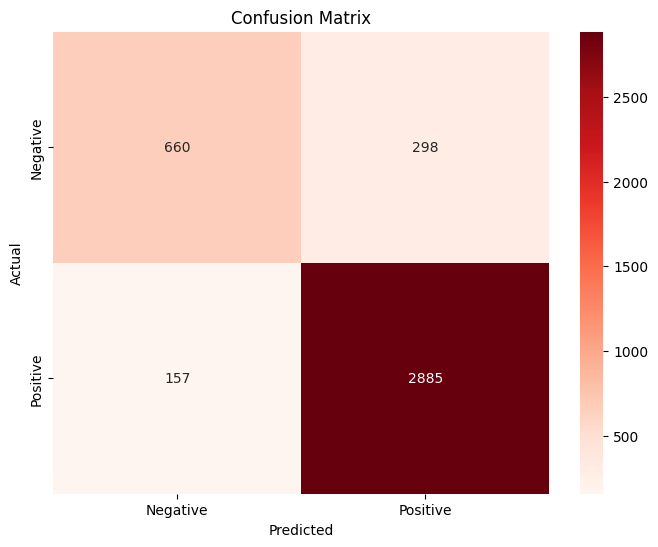

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#confusion matrix object
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
